In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import pandas as pd

OUTPUT_DIR = Path("/work/smt4/thulke/vieweg/SER/Code/sisyphus/output")

sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="deep",
    rc={"text.usetex": True},
    font="Computer Modern",
)

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_finetune_facebook_wav2vec2-base-960h/training/loss.csv


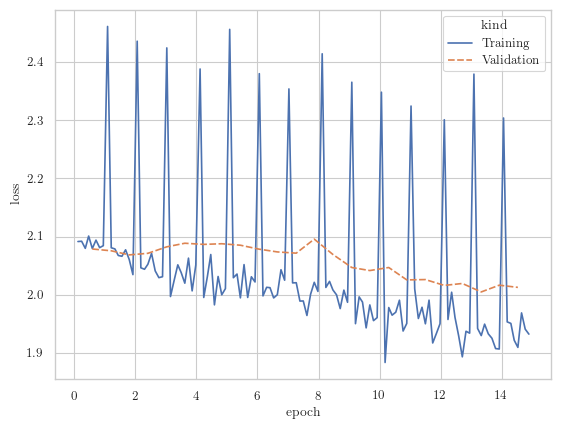

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/loss.csv


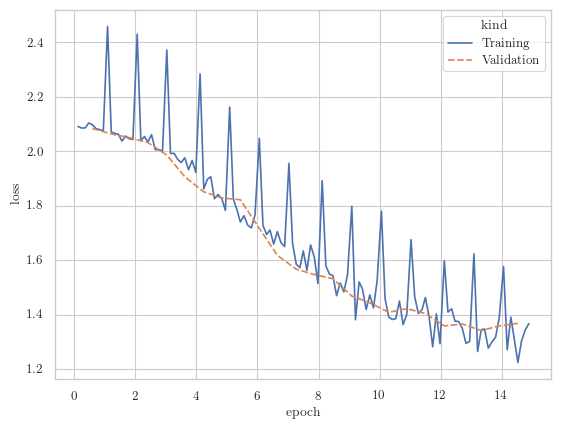

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_featureextract_facebook_wav2vec2-base-960h/training/loss.csv


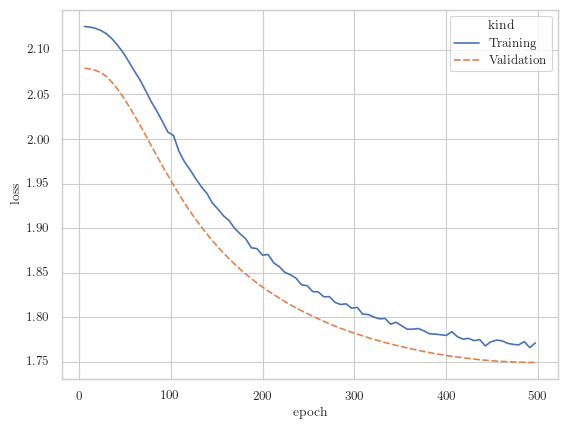

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/yuan/training/loss.csv


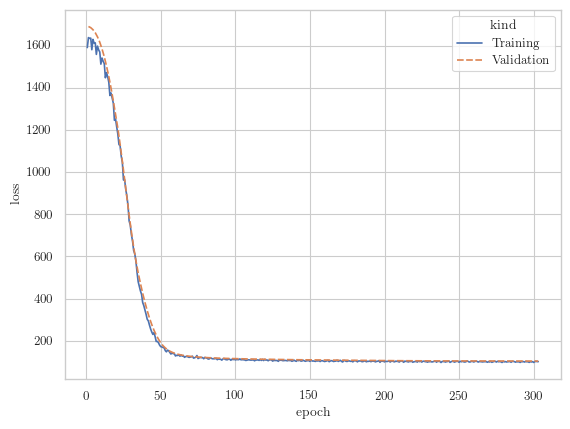

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_featureextract_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/loss.csv


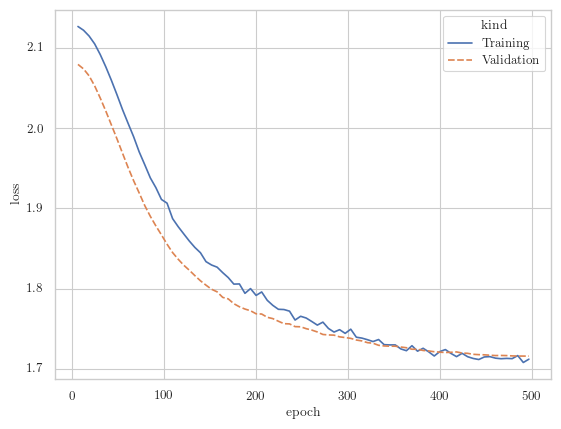

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_featureextract_facebook_wav2vec2-base-960h/training/loss.csv


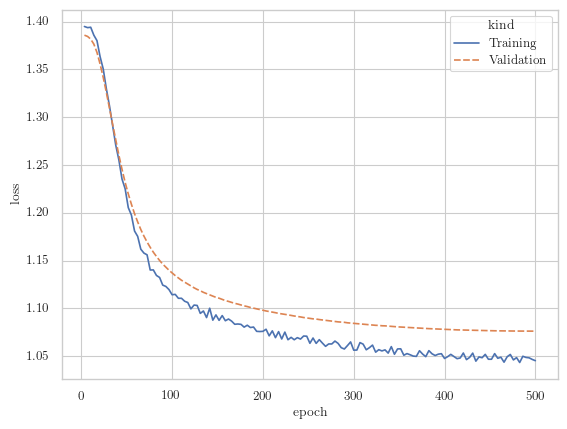

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/loss.csv


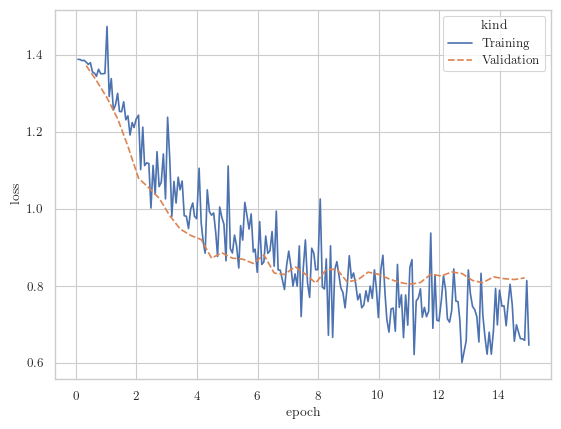

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/yuan/training/loss.csv


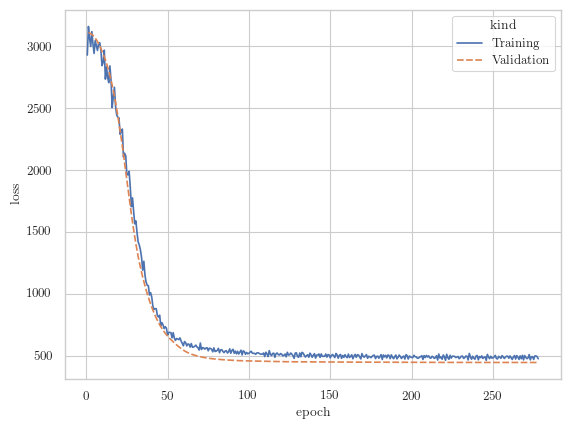

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_finetune_facebook_wav2vec2-base-960h/training/loss.csv


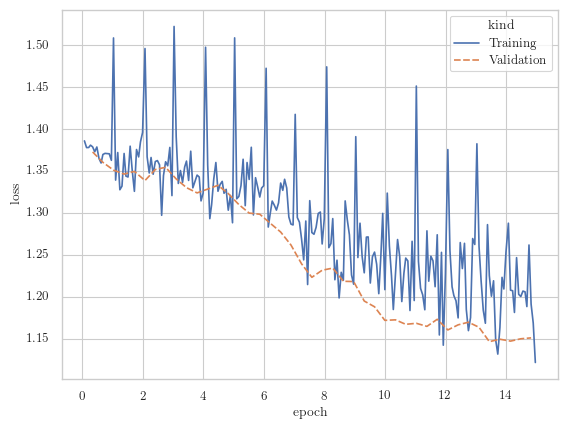

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_featureextract_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/loss.csv


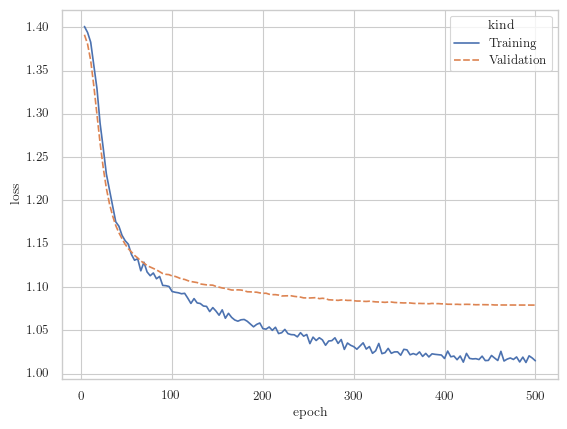

In [5]:
for path in map(Path, glob.glob(f"{OUTPUT_DIR}/**/loss.csv", recursive=True)):
    print(path)
    data = pd.read_csv(path)
    plot = sns.lineplot(
        data=data, x="epoch", y="loss", hue="kind", style="kind", estimator=None
    )
    plt.show()

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_finetune_facebook_wav2vec2-base-960h/training/lr.csv


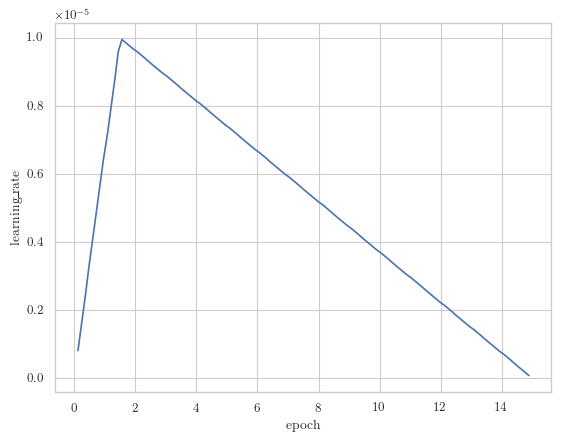

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/lr.csv


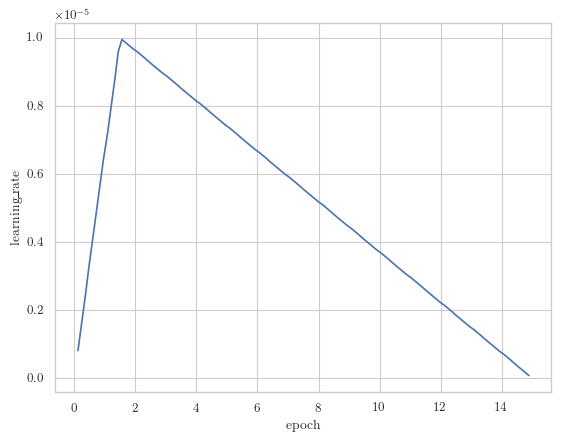

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_featureextract_facebook_wav2vec2-base-960h/training/lr.csv


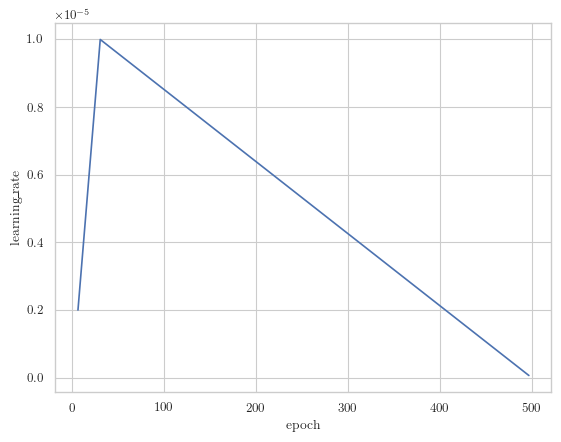

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/yuan/training/lr.csv


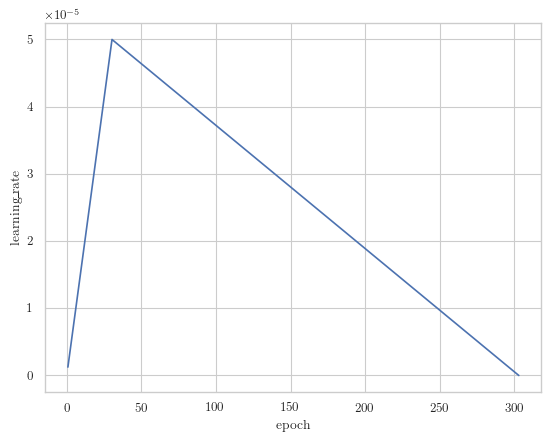

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_featureextract_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/lr.csv


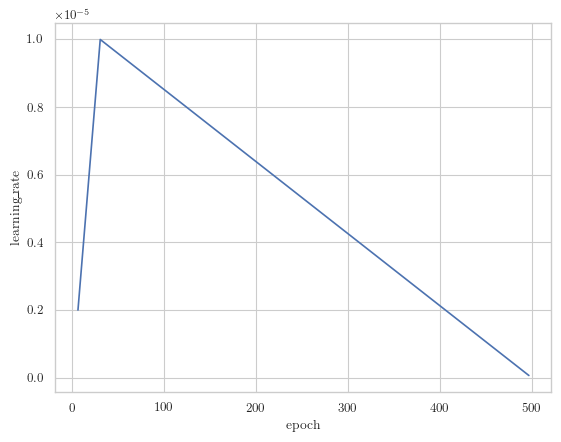

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_featureextract_facebook_wav2vec2-base-960h/training/lr.csv


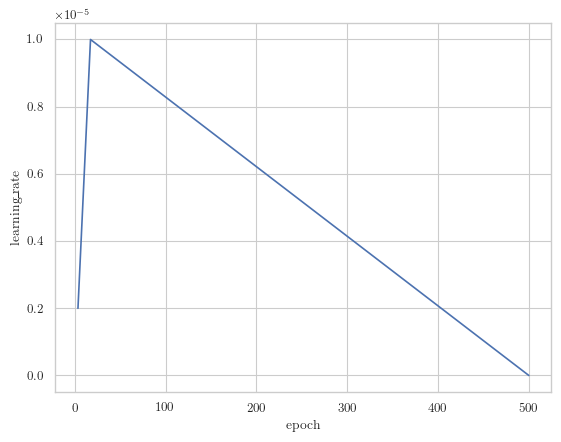

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/lr.csv


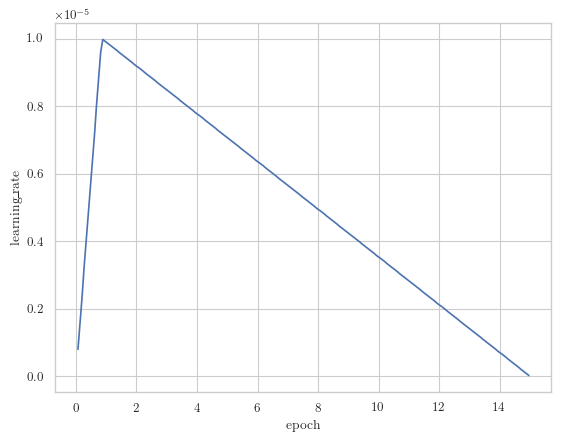

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/yuan/training/lr.csv


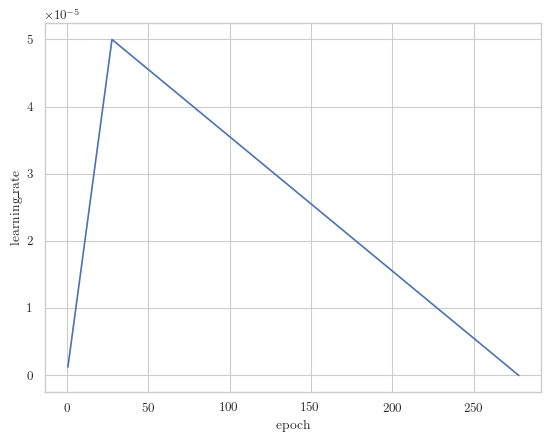

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_finetune_facebook_wav2vec2-base-960h/training/lr.csv


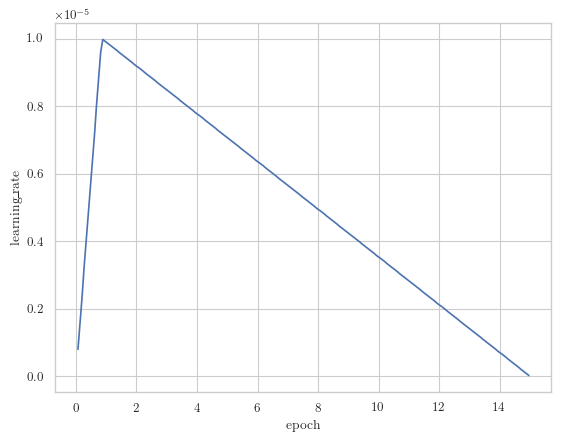

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_featureextract_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/lr.csv


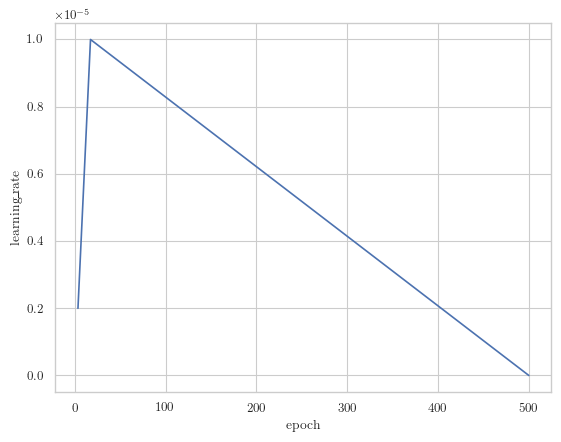

In [6]:
for path in map(Path, glob.glob(f"{OUTPUT_DIR}/**/lr.csv", recursive=True)):
    print(path)
    data = pd.read_csv(path)
    plot = sns.lineplot(data=data, x="epoch", y="learning_rate", estimator=None)
    plt.show()